In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from pathlib import Path
from statsmodels.graphics.tsaplots import plot_acf

In [3]:
# Set plot styling
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

tickers = ['AAL','ALGT','ALK','DAL','ITA','IYT','JBLU','JETS','LUV','UAL','BNO']
tickers_sub = ['AAL','ALGT','ALK','DAL','JBLU','LUV','UAL']

# Load the stock price data
data_path = Path("../../Data/Processed/merged_data_finance.pkl")
with open(data_path, 'rb') as f:
    df = pickle.load(f)

df

,date,ticker,Article Count_cum04_lag01,Article Count_cum16_lag01,Article Count_cum48_lag01,Article Count_cum96_lag01,Article Count_lag01,BNO_Change_High-Low,BNO_Change_High-Low_lag01,BNO_Change_High-Low_ma04,...,v42.8; SCOREDVALUE; fairness_sent_cum04_lag01,v42.8; SCOREDVALUE; fairness_sent_cum16_lag01,v42.8; SCOREDVALUE; fairness_sent_cum48_lag01,v42.8; SCOREDVALUE; fairness_sent_cum96_lag01,v42.8; SCOREDVALUE; fairness_sent_lag01,v42.9; SCOREDVALUE; loyalty_sent_cum04_lag01,v42.9; SCOREDVALUE; loyalty_sent_cum16_lag01,v42.9; SCOREDVALUE; loyalty_sent_cum48_lag01,v42.9; SCOREDVALUE; loyalty_sent_cum96_lag01,v42.9; SCOREDVALUE; loyalty_sent_lag01
0,2018-01-02 09:45:00,AAL,1,6,6,6,0,-0.035,0.020,0.01000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,2018-01-02 09:45:00,ALGT,0,0,0,0,0,-0.035,0.020,0.01000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
2,2018-01-02 09:45:00,ALK,0,3,5,5,0,-0.035,0.020,0.01000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
3,2018-01-02 09:45:00,DAL,0,1,1,1,0,-0.035,0.020,0.01000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
4,2018-01-02 09:45:00,JBLU,1,3,3,3,0,-0.035,0.020,0.01000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337783,2025-05-30 15:45:00,ALK,0,0,4,13,0,-0.020,0.015,0.00875,...,0.0,0.000000,-0.139706,-0.133636,0.0,0.0,0.000000,-0.067318,0.075841,0.0
337784,2025-05-30 15:45:00,DAL,0,4,7,11,0,-0.020,0.015,0.00875,...,0.0,-0.039292,0.056338,-0.185764,0.0,0.0,0.065506,0.186295,0.109351,0.0
337785,2025-05-30 15:45:00,JBLU,0,2,5,20,0,-0.020,0.015,0.00875,...,0.0,0.013177,0.021646,0.389782,0.0,0.0,0.052000,0.107777,0.615597,0.0
337786,2025-05-30 15:45:00,LUV,0,0,1,11,0,-0.020,0.015,0.00875,...,0.0,0.000000,0.028658,-0.189179,0.0,0.0,0.000000,0.042602,0.175897,0.0


In [4]:
sentiment_cols = [i for i in df.columns if any(x in i for x in ['Article Count', 'Tone'])] + [i for i in df.columns if i.startswith('c') or i.startswith('v')]
sentiment_cols = [i for i in sentiment_cols if 'cum' not in i]
sentiment_cols

['Article Count_lag01',
 'Tone_lag01',
 'c16.60; WORDCOUNT; finance_lag01',
 'c18.121; WORDCOUNT; UNSAFE_WORK_ENVIRONMENT_lag01',
 'c18.137; WORDCOUNT; TRIAL_lag01',
 'c18.154; WORDCOUNT; ECON_MONOPOLY_lag01',
 'c18.157; WORDCOUNT; AVIATION_INCIDENT_lag01',
 'c18.164; WORDCOUNT; CORRUPTION_lag01',
 'c18.178; WORDCOUNT; ECON_ENTREPRENEURSHIP_lag01',
 'c18.187; WORDCOUNT; ECON_SUBSIDIES_lag01',
 'c18.188; WORDCOUNT; ECON_DEREGULATION_lag01',
 'c18.189; WORDCOUNT; ECON_NATIONALIZE_lag01',
 'c18.1; WORDCOUNT; KILL_lag01',
 'c18.213; WORDCOUNT; ECON_TAXATION_lag01',
 'c18.214; WORDCOUNT; ECON_REMITTANCE_lag01',
 'c18.215; WORDCOUNT; ECON_INFORMAL_ECONOMY_lag01',
 'c18.21; WORDCOUNT; LEGISLATION_lag01',
 'c18.223; WORDCOUNT; ECON_DEBT_lag01',
 'c18.246; WORDCOUNT; ECON_FREETRADE_lag01',
 'c18.247; WORDCOUNT; ECON_FOREIGNINVEST_lag01',
 'c18.248; WORDCOUNT; ECON_PRICECONTROL_lag01',
 'c18.254; WORDCOUNT; ACT_MAKESTATEMENT_lag01',
 'c18.258; WORDCOUNT; ECON_BOYCOTT_lag01',
 'c18.279; WORDCOUNT

In [5]:
df[['Volume']+sentiment_cols].corr()

,Volume,Article Count_lag01,Tone_lag01,c16.60; WORDCOUNT; finance_lag01,c18.121; WORDCOUNT; UNSAFE_WORK_ENVIRONMENT_lag01,c18.137; WORDCOUNT; TRIAL_lag01,c18.154; WORDCOUNT; ECON_MONOPOLY_lag01,c18.157; WORDCOUNT; AVIATION_INCIDENT_lag01,c18.164; WORDCOUNT; CORRUPTION_lag01,c18.178; WORDCOUNT; ECON_ENTREPRENEURSHIP_lag01,...,v42.10; SCOREDVALUE; authority_sent_lag01,v42.11; SCOREDVALUE; sanctity_sent_lag01,v42.2; SCOREDVALUE; care_p_lag01,v42.3; SCOREDVALUE; fairness_p_lag01,v42.4; SCOREDVALUE; loyalty_p_lag01,v42.5; SCOREDVALUE; authority_p_lag01,v42.6; SCOREDVALUE; sanctity_p_lag01,v42.7; SCOREDVALUE; care_sent_lag01,v42.8; SCOREDVALUE; fairness_sent_lag01,v42.9; SCOREDVALUE; loyalty_sent_lag01
Volume,1.000000,0.137874,-0.038989,0.039882,0.009139,0.005162,0.006958,0.006731,0.001020,0.008629,...,-0.054699,-0.095269,0.163489,0.166926,0.164853,0.164220,0.167624,-0.149666,-0.068041,0.020357
Article Count_lag01,0.137874,1.000000,-0.580472,0.273322,0.045369,0.589747,0.136673,0.419659,0.392685,0.080240,...,-0.234376,-0.421137,0.621584,0.620754,0.622454,0.622155,0.621458,-0.571633,-0.317143,-0.020574
Tone_lag01,-0.038989,-0.580472,1.000000,-0.129890,-0.018041,-0.691375,-0.106365,-0.477900,-0.474655,0.025009,...,0.364908,0.353215,-0.145727,-0.126937,-0.139183,-0.137009,-0.133087,0.283393,0.413398,0.401288
c16.60; WORDCOUNT; finance_lag01,0.039882,0.273322,-0.129890,1.000000,0.024066,0.200608,0.050376,0.104329,0.197834,0.096015,...,-0.018392,-0.073841,0.177198,0.184960,0.176200,0.176379,0.179300,-0.129629,-0.022121,0.056337
c18.121; WORDCOUNT; UNSAFE_WORK_ENVIRONMENT_lag01,0.009139,0.045369,-0.018041,0.024066,1.000000,0.009917,0.004975,0.002279,0.003698,0.002182,...,-0.032060,-0.040416,0.065304,0.067226,0.065508,0.064774,0.062120,-0.057924,-0.031052,0.008871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
v42.5; SCOREDVALUE; authority_p_lag01,0.164220,0.622155,-0.137009,0.176379,0.064774,0.071856,0.053133,0.157270,0.027410,0.077871,...,-0.392852,-0.684415,0.995791,0.996201,0.997628,1.000000,0.996259,-0.908831,-0.511245,-0.045359
v42.6; SCOREDVALUE; sanctity_p_lag01,0.167624,0.621458,-0.133087,0.179300,0.062120,0.071448,0.051219,0.150934,0.027493,0.078505,...,-0.385987,-0.678840,0.996013,0.996758,0.996142,0.996259,1.000000,-0.905032,-0.502768,-0.030029
v42.7; SCOREDVALUE; care_sent_lag01,-0.149666,-0.571633,0.283393,-0.129629,-0.057924,-0.093384,-0.037419,-0.214256,-0.025733,-0.042632,...,0.609212,0.828170,-0.913656,-0.896652,-0.908772,-0.908831,-0.905032,1.000000,0.751243,0.345731
v42.8; SCOREDVALUE; fairness_sent_lag01,-0.068041,-0.317143,0.413398,-0.022121,-0.031052,-0.087444,-0.012999,-0.248402,-0.018298,0.007012,...,0.824404,0.845939,-0.528435,-0.482660,-0.512344,-0.511245,-0.502768,0.751243,1.000000,0.742381


C:\Users\Steven\AppData\Local\Temp\ipykernel_13652\1851109879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volumes.rename(columns={


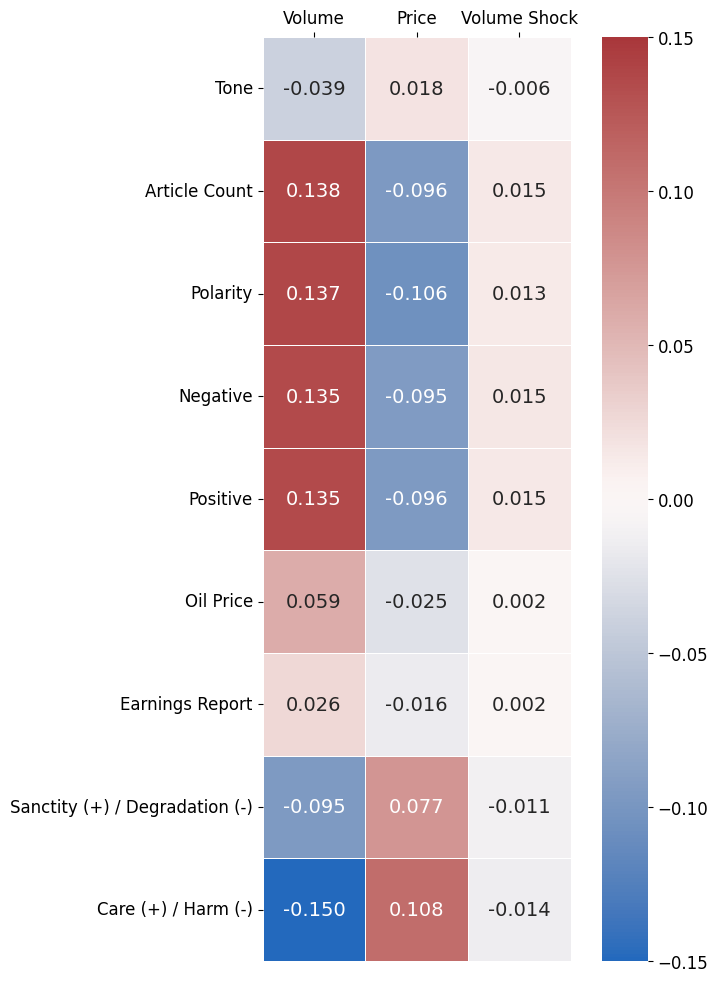

In [31]:
volumes = df[['Volume', 'Volume_lag01', 'Last', 'Last_lag01', 'Volume_Shock_ma04', 'Tone_lag01', 'Article Count_lag01', 'v11.1; SCOREDVALUE; Polarity (Scored Value)_lag01', 'v10.2; SCOREDVALUE; Negative (Scored Value)_lag01', 'v10.1; SCOREDVALUE; Positive (Scored Value)_lag01', 'c18.314; WORDCOUNT; ECON_OILPRICE_lag01', 'c18.60; WORDCOUNT; ECON_EARNINGSREPORT_lag01', 'v42.7; SCOREDVALUE; care_sent_lag01', 'v42.11; SCOREDVALUE; sanctity_sent_lag01']]

volumes.rename(columns={
    'Tone_lag01': 'Tone',
    'Article Count_lag01': 'Article Count',
    'v11.1; SCOREDVALUE; Polarity (Scored Value)_lag01': 'Polarity',
    'v10.2; SCOREDVALUE; Negative (Scored Value)_lag01': 'Negative',
    'v10.1; SCOREDVALUE; Positive (Scored Value)_lag01': 'Positive',
    'c18.314; WORDCOUNT; ECON_OILPRICE_lag01': 'Oil Price',
    'c18.60; WORDCOUNT; ECON_EARNINGSREPORT_lag01': 'Earnings Report',
    'v42.7; SCOREDVALUE; care_sent_lag01': 'Care (+) / Harm (-)',
    'v42.11; SCOREDVALUE; sanctity_sent_lag01': 'Sanctity (+) / Degradation (-)',
    'Last': 'Price',
    'Volume_Shock_ma04': 'Volume Shock'
}, inplace=True)

# Compute correlation matrix
correlation_matrix = volumes.corr()
correlation_matrix = correlation_matrix[['Volume', 'Price', 'Volume Shock']]
correlation_matrix = correlation_matrix.filter(['Tone', 'Article Count', 'Polarity', 'Negative', 'Positive', 'Oil Price', 'Earnings Report', 'Sanctity (+) / Degradation (-)', 'Care (+) / Harm (-)'], axis=0)
correlation_matrix

# Visualize the correlation matrix as a heatmap
plot_data = correlation_matrix
plt.figure(figsize=(8, 12))
ax = sns.heatmap(plot_data, annot=True, cmap='vlag', vmin=-0.15, vmax=0.15, fmt='.3f',linewidths=0.5,square=True,annot_kws={'size': 14})
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.savefig('../../Output/correlations.pdf', bbox_inches='tight')

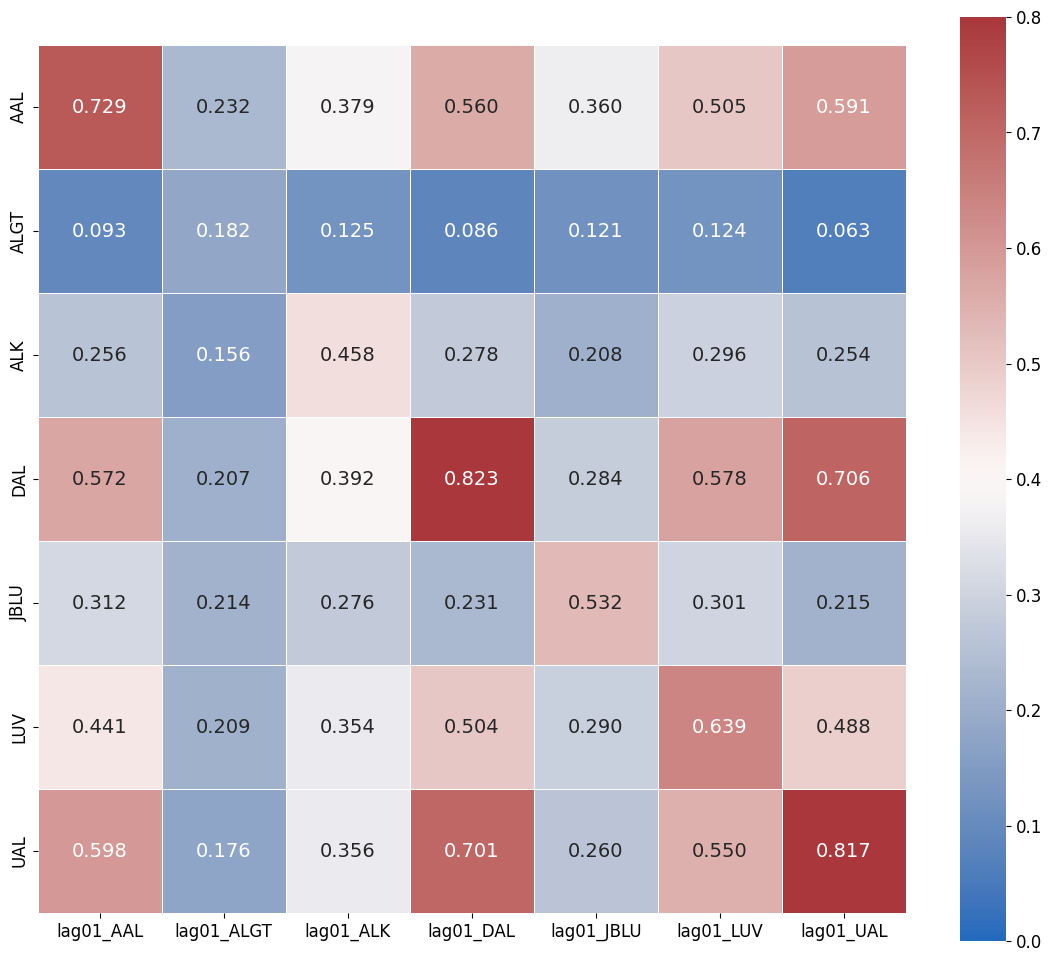

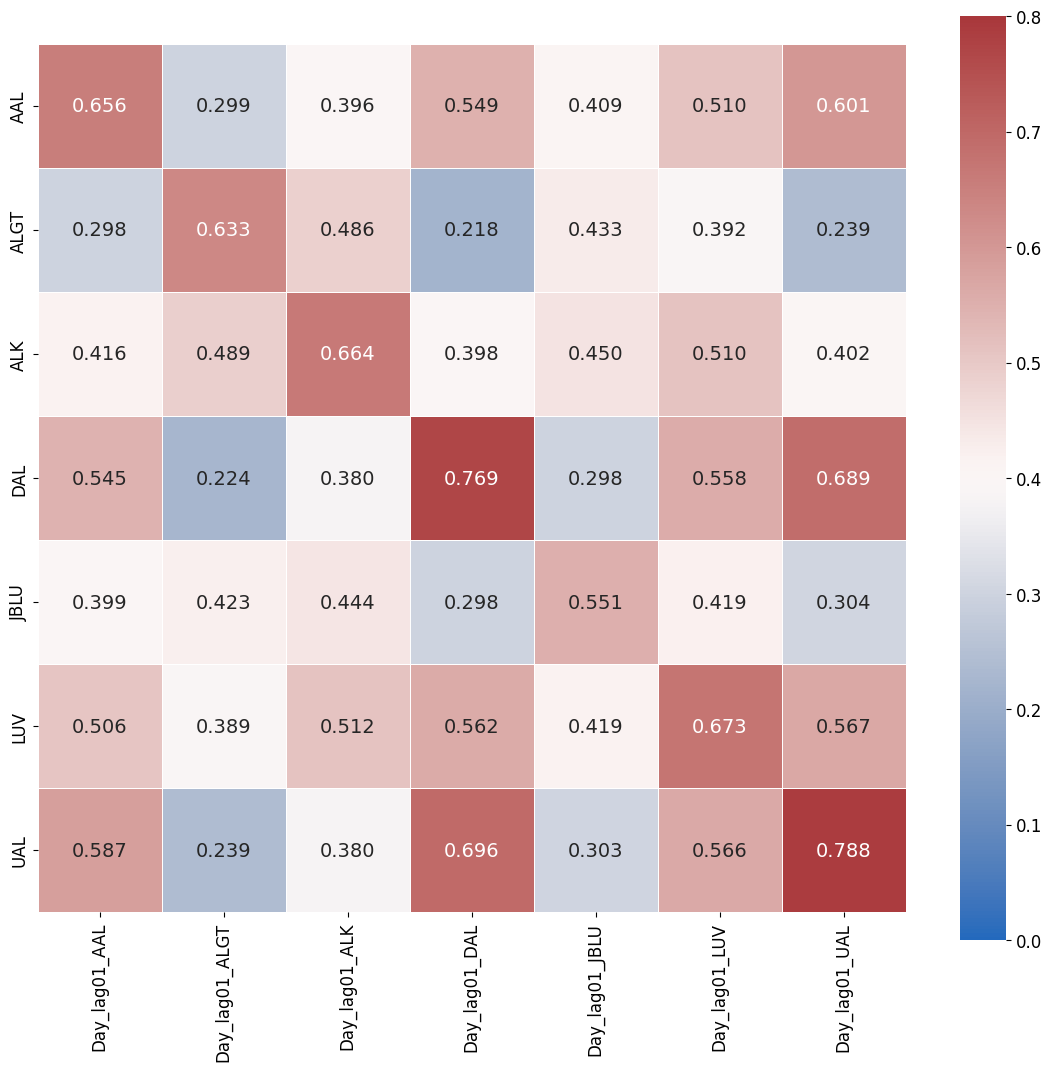

In [5]:
df['ti']=df['date'].dt.time
df.sort_values(by=['ticker', 'date'], inplace=True)

df[f'Volume_Day_lag01'] = None

for time_val in df['ti'].unique():
    mask = df['ti'] == time_val
    subset = df[mask].copy()
    subset = subset.sort_values(['ticker', 'date'])
    
    # Calculate lag for each ticker separately
    lagged_values = subset.groupby('ticker')['Volume'].shift(1)
    df.loc[mask, f'Volume_Day_lag01'] = lagged_values.values

df[f'Volume_Day_lag01'] = df[f'Volume_Day_lag01'].astype(float)

controls = df[['date', 'BNO_Volume', 'ITA_Volume', 'IYT_Volume', 'JETS_Volume'
               , 'BNO_Volume_lag01', 'ITA_Volume_lag01', 'IYT_Volume_lag01', 'JETS_Volume_lag01']].drop_duplicates().reset_index(drop=True)
controls.rename(columns={
    'BNO_Volume': 'BNO',
    'ITA_Volume': 'ITA',
    'IYT_Volume': 'IYT',
    'JETS_Volume': 'JETS',
    'BNO_Volume_lag01': 'BNO_lag01',
    'ITA_Volume_lag01': 'ITA_lag01',
    'IYT_Volume_lag01': 'IYT_lag01',
    'JETS_Volume_lag01': 'JETS_lag01'
}, inplace=True)

volumes = df[['date', 'ticker', 'Volume', 'Volume_lag01', 'Volume_Day_lag01', 'Change_Volume']].pivot(index='date', columns='ticker', values=['Volume', 'Volume_lag01', 'Volume_Day_lag01', 'Change_Volume'])
# Flatten the MultiIndex columns
volumes.columns = ['_'.join(col).strip() for col in volumes.columns.values]
volumes.columns = [col.replace('Volume_', '') for col in volumes.columns.values]

#volumes = pd.merge(volumes, controls, on='date', how='left').reset_index(drop=True)
volumes = volumes.dropna()

# Compute correlation matrix
correlation_matrix = volumes.corr()

# Visualize the correlation matrix as a heatmap
plot_data = correlation_matrix.filter([f'{i}' for i in tickers_sub], axis=0).copy()
plot_data=plot_data[[f'lag01_{i}' for i in tickers_sub]]
plt.figure(figsize=(14, 12))
sns.heatmap(plot_data, annot=True, cmap='vlag', vmin=-0, vmax=0.8, fmt='.3f',linewidths=0.5,square=True,annot_kws={'size': 14})
plt.savefig('../../Output/Correlation Matrices/Lagged_Volume.pdf')

# Visualize the correlation matrix as a heatmap
plot_data = correlation_matrix.filter([f'{i}' for i in tickers_sub], axis=0).copy()
plot_data=plot_data[[f'Day_lag01_{i}' for i in tickers_sub]]
plt.figure(figsize=(14, 12))
sns.heatmap(plot_data, annot=True, cmap='vlag', vmin=-0, vmax=0.8, fmt='.3f',linewidths=0.5,square=True,annot_kws={'size': 14})
plt.savefig('../../Output/Correlation Matrices/Lagged_Volume_Day.pdf')

In [ ]:
# Plot autocorrelation for AAL stock for the first 50 lags
plt.figure(figsize=(14, 8))

# Create a clean autocorrelation plot
plot_acf(volumes['AAL'].dropna(), 
         lags=260, 
         alpha=0.05, 
         title=f'Autocorrelation of AAL Stock Price Change (First 50 Lags)',
         zero=False,
         auto_ylims=True)

# Enhance plot appearance
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Autocorrelation', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

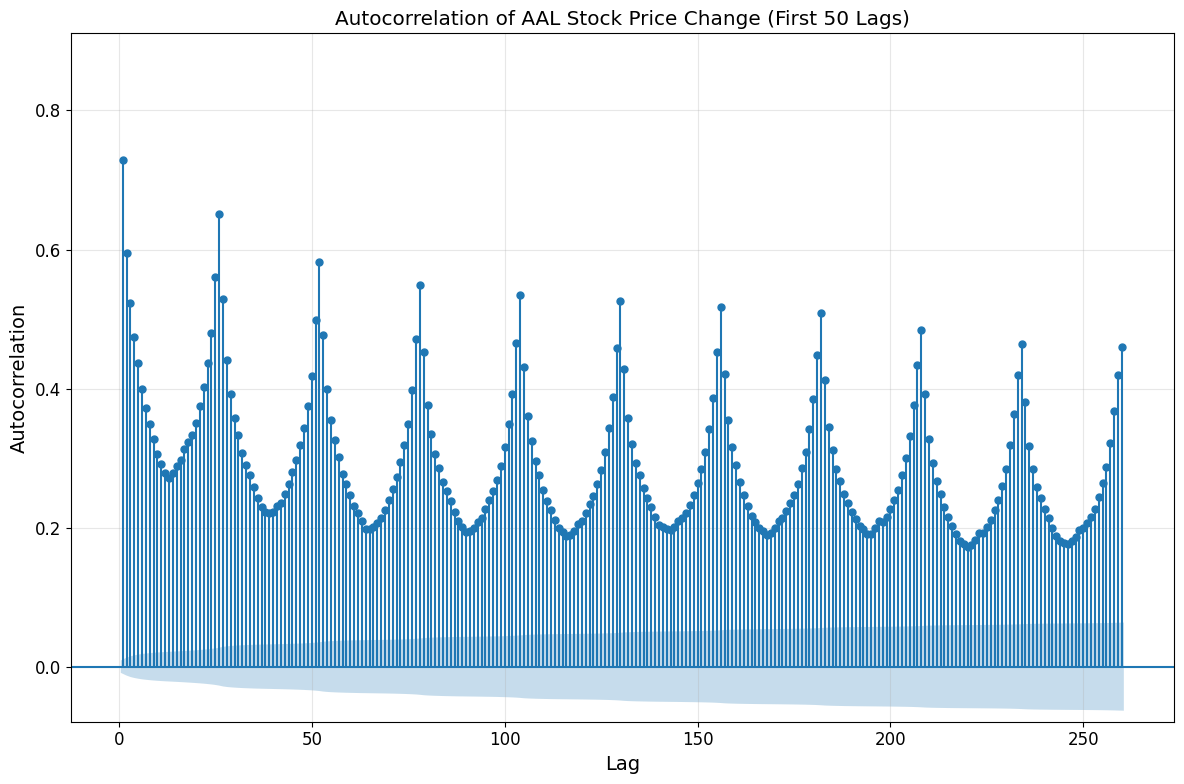

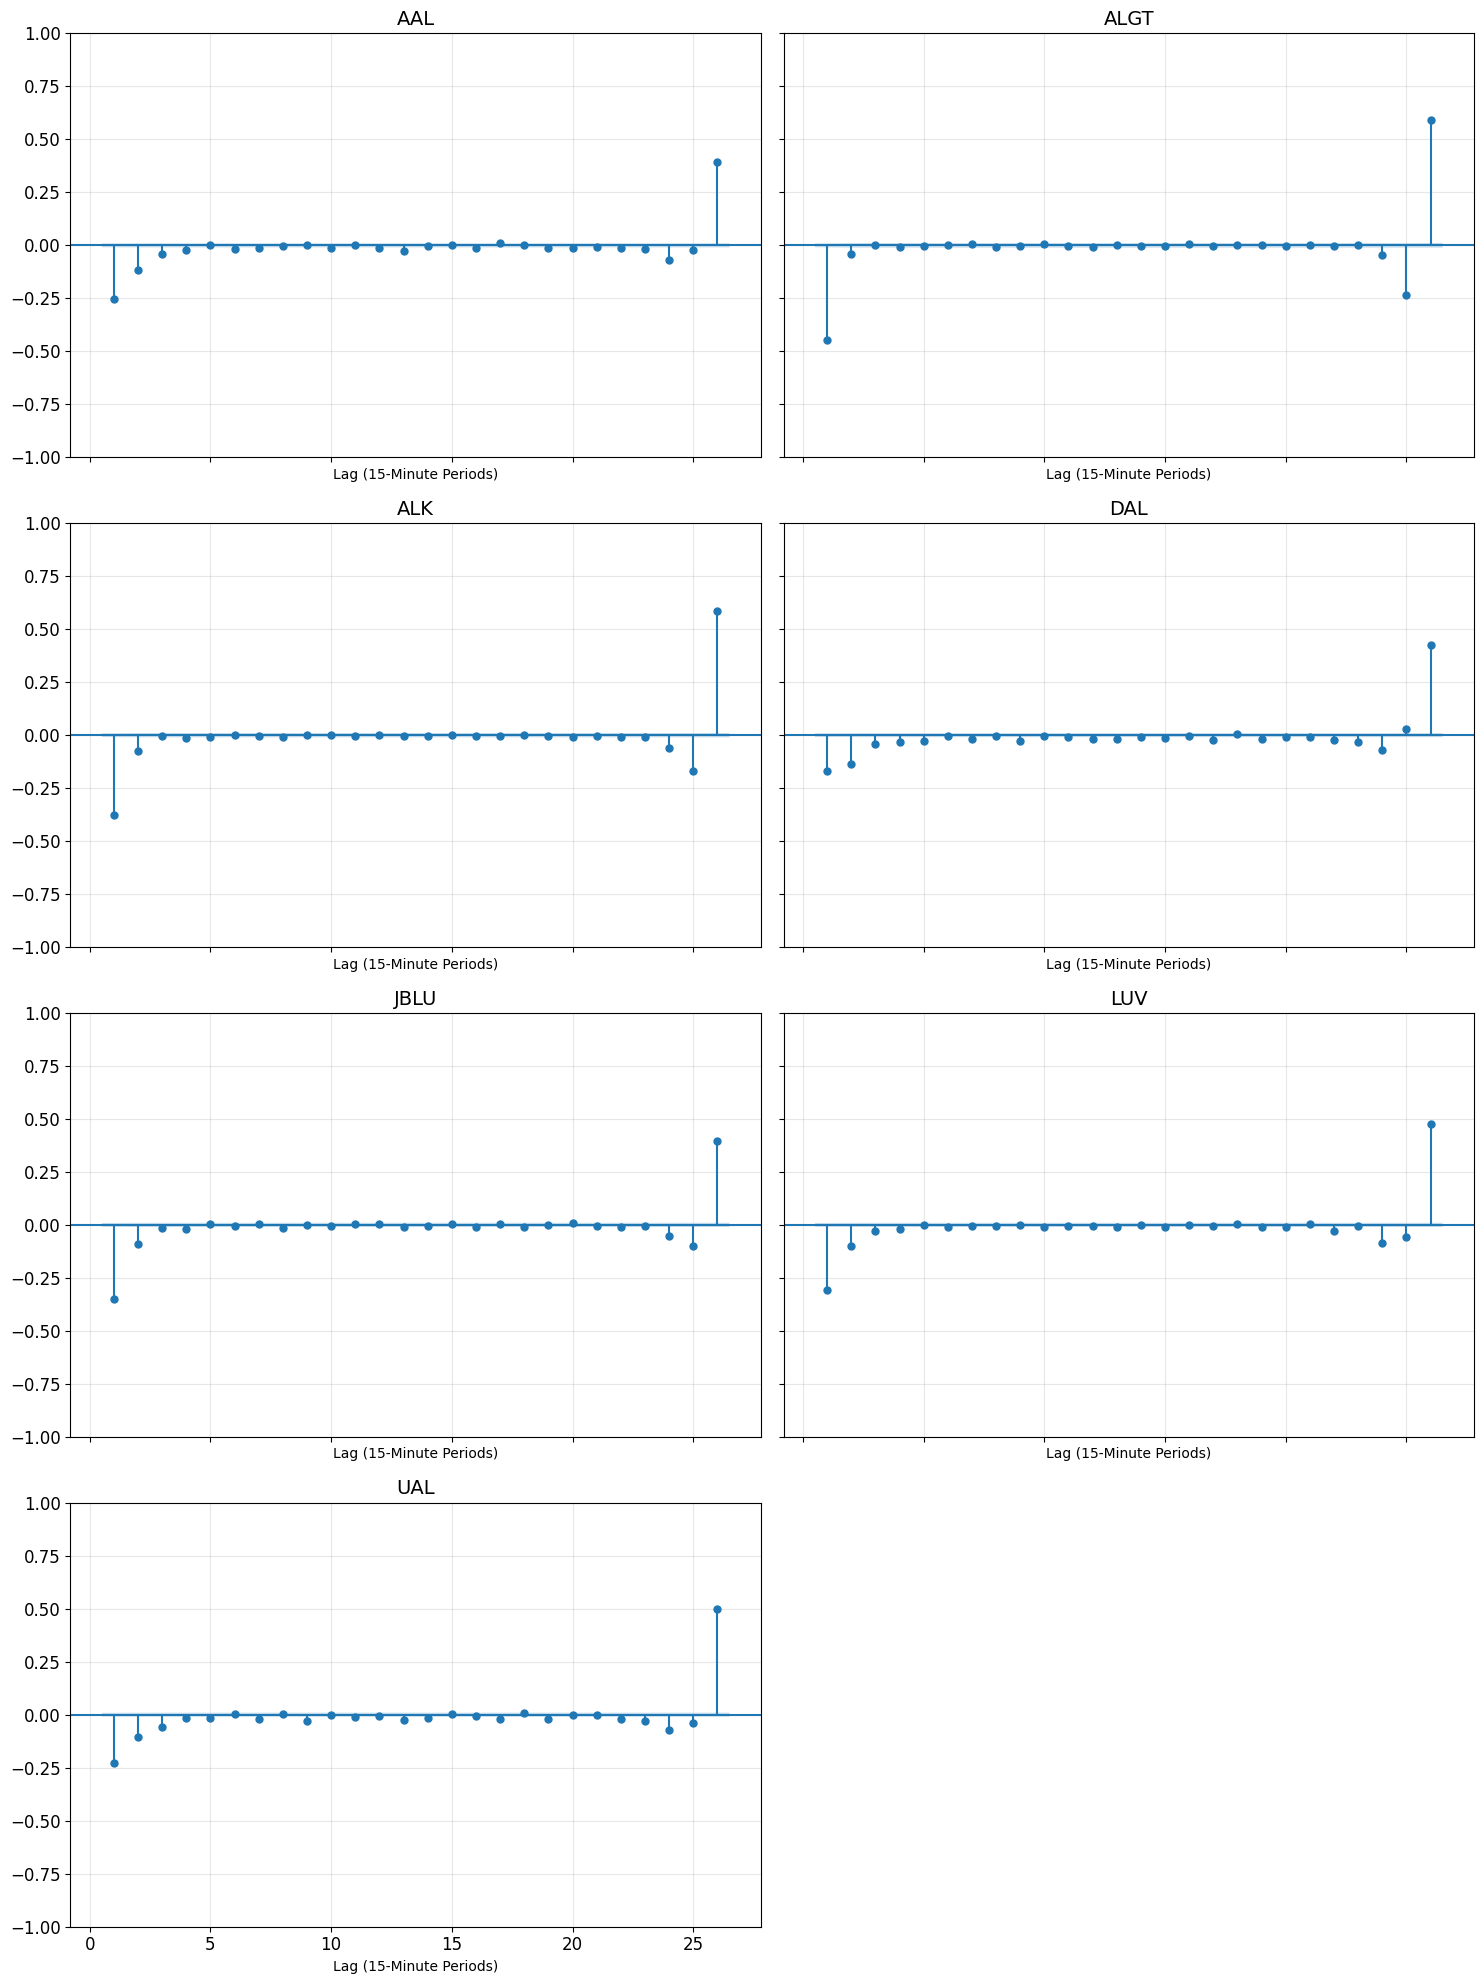

In [7]:
# Create a matrix of autocorrelation plots for all tickers
fig, axes = plt.subplots(4, 2, figsize=(15, 20), sharex=True, sharey=True)
axes = axes.flatten()

for i, ticker in enumerate(tickers_sub):
    # Plot autocorrelation for each ticker
    plot_acf(volumes[f'Change_{ticker}'].dropna(), 
             lags=26, 
             alpha=0.05, 
             title=f'{ticker}',
             zero=False,
             auto_ylims=False,
             ax=axes[i])
    
    # Customize each subplot
    axes[i].set_xlabel('Lag (15-Minute Periods)', fontsize=10)
    axes[i].grid(True, alpha=0.3)
    axes[i].set_title(f'{ticker}', fontsize=14)

# Remove unused subplots
for j in range(len(tickers_sub), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('../../Output/Correlation Matrices/Autocorrelations.pdf')